McDonalds Case Study code replication from R to python 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().system('pip install bioinfokit')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv("/content/mcdonalds.csv")

In [3]:
df.shape

(1453, 15)

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.isna()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

We can see that the dataset have no null values.                                         Now lets convert the dataset 11 coulmns into a matrix 


In [7]:
x = df.iloc[:, 0:11].to_numpy()
x = (x == "Yes") + 0

# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [15]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [32]:
df_updated = df.loc[:,cat]
df_updated

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


Lets do Principal Component Analysis

In [8]:
#Principal component analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [10]:
## Lets see the Standard Deviations of 1 to 11 columns
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [11]:
## Cumulative proportion of the standard deviations 
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [12]:
## Shape of the rotation matrix
rotation = pca.components_
print(rotation.shape)

(11, 11)


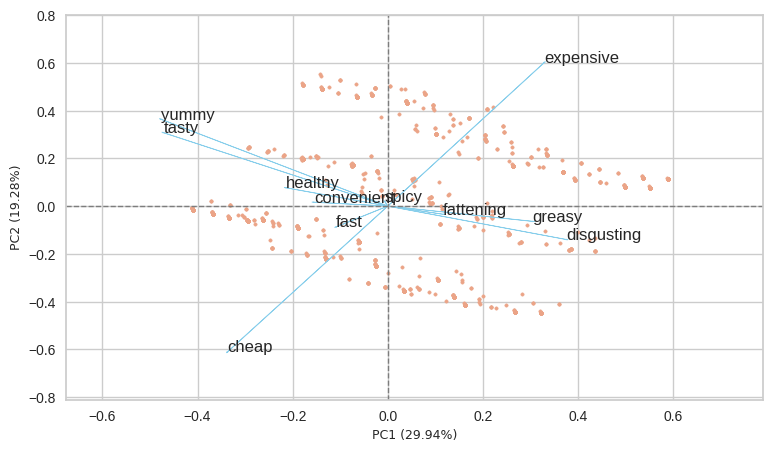

In [31]:
import warnings
warnings.filterwarnings('ignore')
pca_scores = PCA().fit_transform(x)
loads = pca.components_

# get 2D biplot
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca_scores, loadings=loads, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(9,5))

Next step of ours is extracting the segments by using k-means clustering analysis

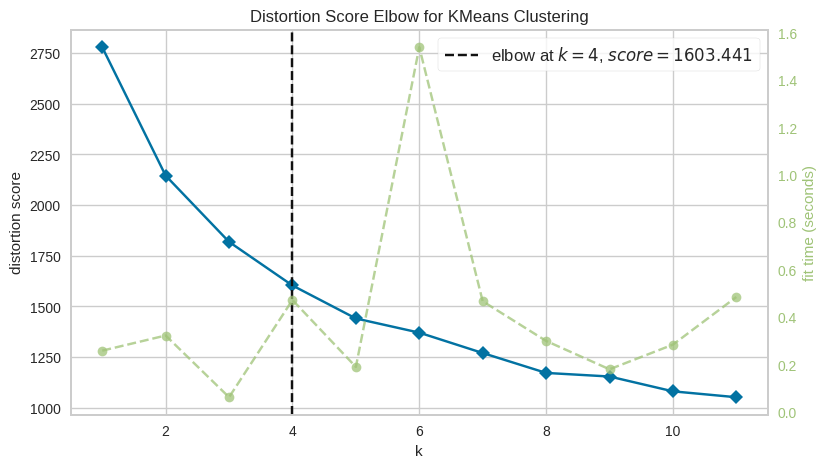

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings 
warnings.filterwarnings('ignore')

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_updated)
visualizer.show()

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_updated)
df['cluster_num'] = kmeans.labels_ 
print(kmeans.labels_)
print(kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_) 

[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


lets visualise the clusters by plotting them 


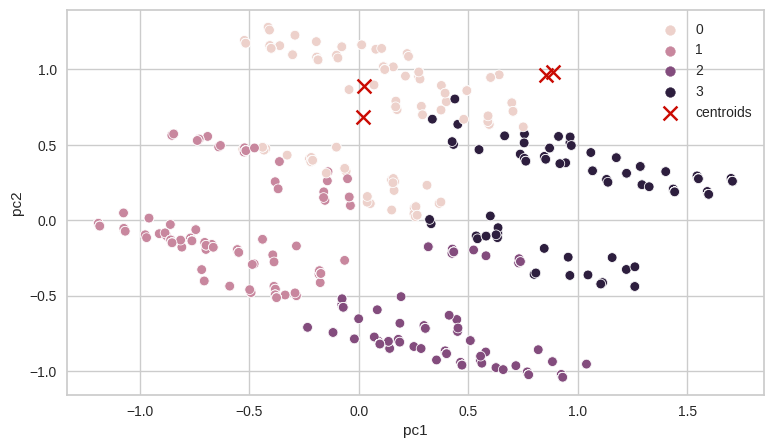

In [30]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", c="r", s=100, label="centroids")
plt.legend()
plt.show()

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

ct =pd.crosstab(df['cluster_num'],df['Like'])
ct = ct[['-4','-3','-2','-1','0','+1','+2','+3','+4']]
ct 

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,
0,3,7,6,7,36,42,60,66,47
1,4,2,6,13,43,65,90,143,111
2,36,34,28,25,51,31,31,12,2
3,28,30,19,13,39,14,6,8,0


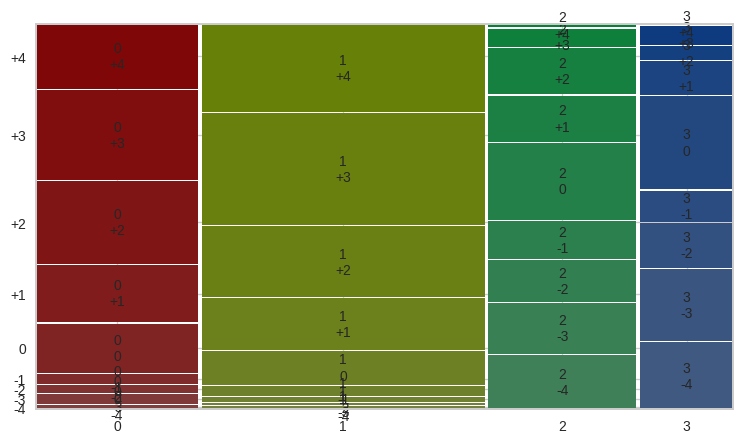

In [29]:
# lets see the mosaic plot for the above determined crossstab 
plt.rcParams['figure.figsize'] = (9,5)
mosaic(ct.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

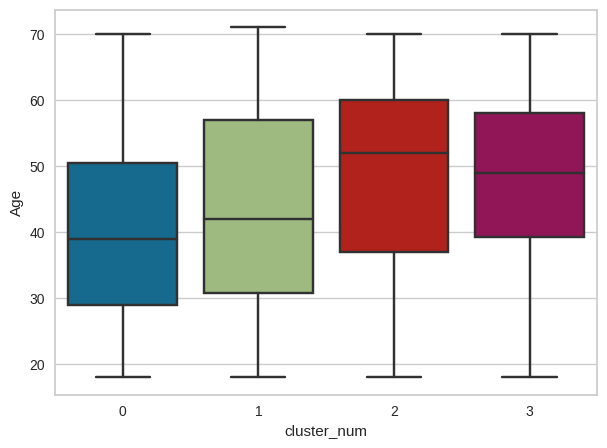

In [22]:
sns.boxplot(x="cluster_num", y="Age", data=df)

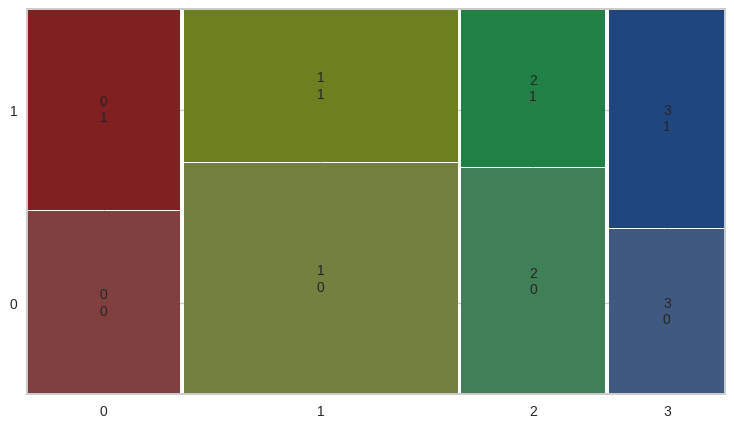

In [28]:
# lets see the mosaic plot for gender and segment membership
ct_gender =pd.crosstab(df['cluster_num'],df['Gender'])
plt.rcParams['figure.figsize'] = (9,5)
mosaic(ct_gender.stack())
plt.show()

In [37]:
# selection of the target segments 
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()

df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()

df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


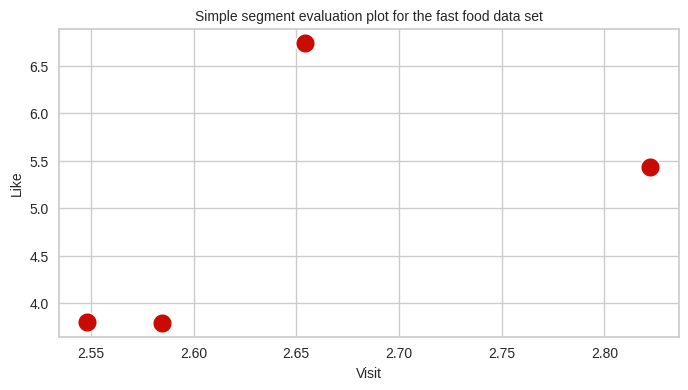

In [27]:
# Plotting the Target segments

plt.figure(figsize = (8,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=200, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 10) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10)
plt.show()